In [1]:
import sunpy.map
import sunpy.visualization.colormaps as cm
import sunpy.sun.constants
from sunpy.map.maputils import all_coordinates_from_map, coordinate_is_on_solar_disk
from sunpy.image.resample import resample

import astropy.units as u
from astropy.constants import G, M_sun, R_sun, au
from astropy.time import Time
from astropy.coordinates import get_body_barycentric_posvel
from astropy.units import imperial
from astropy.stats import gaussian_fwhm_to_sigma

import scipy
from scipy import ndimage
import matplotlib.pyplot as plt
import plotly.tools as tls
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

import pickle
import numpy as np
import cupy as cp
import pandas as pd
import math
from math import pi
import glob
import time
import datetime
import os
import importlib
import warnings

from PIL import Image
from fpdf import FPDF

In [3]:
aia_df= pd.read_pickle('data//aia.pkl')

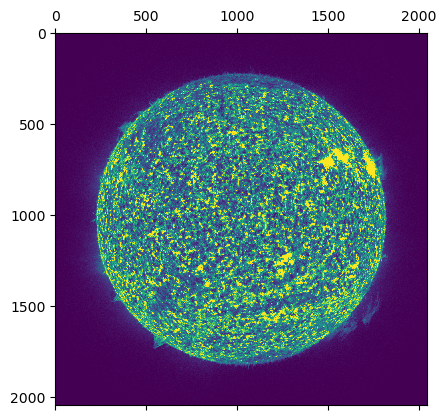

In [10]:
plt.matshow(aia_df.loc[10,'image'],vmax=100)

In [11]:
aia_df

,time,image,filename
0,2010-06-01 00:00:08.120,"[[0.003302, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001377,...",./data/AIA_1p5\aia_lev1_304a_2010_06_01t00_00_...
1,2010-06-02 00:05:38.120,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.276e-05...",./data/AIA_1p5\aia_lev1_304a_2010_06_02t00_05_...
2,2010-06-03 00:00:02.130,"[[0.0, 0.0, 3.535e-05, 0.0, 0.0, 5.496e-05, 0....",./data/AIA_1p5\aia_lev1_304a_2010_06_03t00_00_...
3,2010-06-04 00:00:02.130,"[[0.0, 0.0, 0.0, 0.0004733, 0.0, 0.0, 0.0, 0.0...",./data/AIA_1p5\aia_lev1_304a_2010_06_04t00_00_...
4,2010-06-05 00:00:05.500,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,...",./data/AIA_1p5\aia_lev1_304a_2010_06_05t00_00_...
...,...,...,...
1455,2014-05-27 00:00:07.140,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",./data/AIA_1p5\aia_lev1_304a_2014_05_27t00_00_...
1456,2014-05-28 00:00:07.120,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",./data/AIA_1p5\aia_lev1_304a_2014_05_28t00_00_...
1457,2014-05-29 00:00:07.130,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",./data/AIA_1p5\aia_lev1_304a_2014_05_29t00_00_...
1458,2014-05-30 00:00:07.120,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",./data/AIA_1p5\aia_lev1_304a_2014_05_30t00_00_...
